In [1]:
import pickle
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_context('paper')

# Fire rate / current external

In [2]:
rates, currents, CV, v_soma = [], [], {}, {}

for batch_number in range(1,21):
    batch_number = str(batch_number).zfill(4)

    for current in range(5):
        with open(f'../data3/v1_batch{batch_number}/v1_batch{batch_number}_0_{current}_data.pkl', 'rb') as f:
            data = pickle.load(f)
        amp = data['simConfig']['IClamp0']['amp']
        time = data['simData']['t']
        currents.append(amp)
        v_soma[amp] = data['simData']['V_soma']['cell_0']


        with open(f'../data3/v1_batch{batch_number}/v1_batch{batch_number}_0_{current}_rate.json', 'rb') as f:
            rate = json.load(f)
        rates.append(np.mean(rate['statData']))

        with open(f'../data3/v1_batch{batch_number}/v1_batch{batch_number}_0_{current}_CV.json', 'rb') as f:
            cv = json.load(f)
        CV[amp] = np.mean(cv['statData'])

for batch_number in range(1,14):
    batch_number = str(batch_number).zfill(4)

    for current in range(4):
        with open(f'../data3/v2_batch{batch_number}/v2_batch{batch_number}_0_{current}_data.pkl', 'rb') as f:
            data = pickle.load(f)
        amp = data['simConfig']['IClamp0']['amp']
        currents.append(amp)
        v_soma[amp] = data['simData']['V_soma']['cell_0']

        with open(f'../data3/v2_batch{batch_number}/v2_batch{batch_number}_0_{current}_rate.json', 'rb') as f:
            rate = json.load(f)
        rates.append(np.mean(rate['statData']))

        with open(f'../data3/v2_batch{batch_number}/v2_batch{batch_number}_0_{current}_CV.json', 'rb') as f:
            cv = json.load(f)
        CV[amp] = np.mean(cv['statData'])

# for batch_number in range(1,21):
#     batch_number = str(batch_number).zfill(4)

#     for current in range(5):
#         with open(f'../data3/v3_batch{batch_number}/v3_batch{batch_number}_0_{current}_data.pkl', 'rb') as f:
#             data = pickle.load(f)
#         amp = data['simConfig']['IClamp0']['amp']
#         currents.append(amp)
#         v_soma[amp] = data['simData']['V_soma']['cell_0']

#         with open(f'../data3/v3_batch{batch_number}/v3_batch{batch_number}_0_{current}_rate.json', 'rb') as f:
#             rate = json.load(f)
#         rates.append(np.mean(rate['statData']))

#         with open(f'../data3/v3_batch{batch_number}/v3_batch{batch_number}_0_{current}_CV.json', 'rb') as f:
#             cv = json.load(f)
#         CV[amp] = np.mean(cv['statData'])


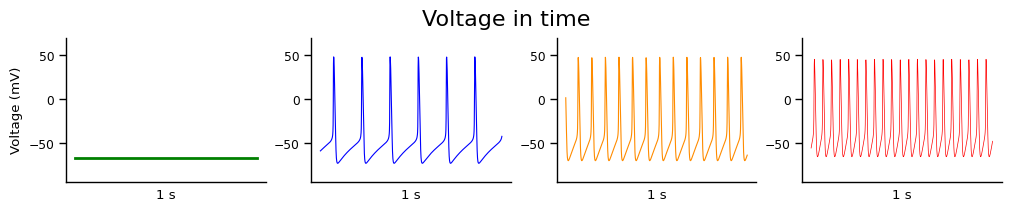

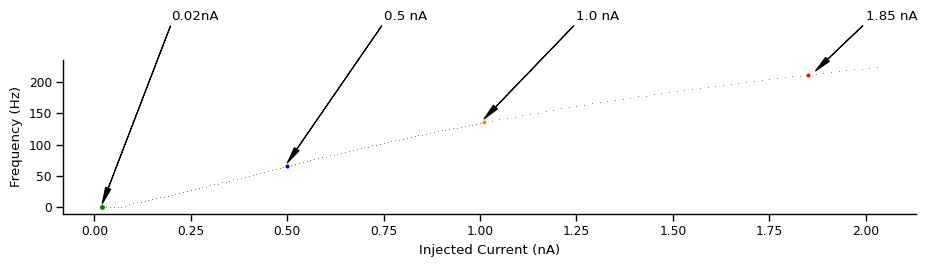

In [3]:

f, ax = plt.subplots(1,4, figsize=(10,2), layout='constrained')
f.suptitle('Voltage in time', fontsize=16)
ax0, ax1, ax2, ax3 = ax
sns.lineplot(x = time[-1000:], y = v_soma[0.02][-1000:], color='green', ax=ax0, linewidth=2)
#ax0.set_title(f'0.02 nA', fontsize=14)
sns.lineplot(x = time[-1000:], y = v_soma[0.5][-1000:], color='blue', ax=ax1, linewidth=0.8)
#ax1.set_title(f'0.5 nA', fontsize=12)
sns.lineplot(x = time[-1000:], y = v_soma[1.0][-1000:], color='darkorange', ax=ax2, linewidth=0.8)
#ax2.set_title('1.0 nA', fontsize=14)

sns.lineplot(x = time[-1000:], y = v_soma[1.85][-1000:], color='red', ax=ax3, linewidth=0.5)
#ax3.set_title('1.85 nA')

ax0.set_ylabel('Voltage (mV)')
for axis in ax:
    axis.set_ylim(-95, 70)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.set_xlabel('1 s')
    axis.set_xticklabels(['','',''])
    axis.set_xticks([], major=True)



plt.show()

f, ax = plt.subplots(1,1, figsize=(11,2)) #figsize=(12,2))
arrowprops = dict(facecolor='black', width=0.009 , headwidth=4)
delta = 5

#ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.005))
sns.scatterplot(x = currents, y = rates, color='black', s=0.4, ax=ax)

sns.scatterplot(x = currents[:1], y = rates[:1], color='green', s=15, ax=ax)
ax.annotate('0.02nA', xy=( currents[0], rates[0]+delta), xytext=(0.2, 300), arrowprops=arrowprops)

sns.scatterplot(x = currents[48:49], y = rates[48:49], color='blue', s=10, ax=ax)
ax.annotate('0.5 nA', xy=( currents[48], rates[48]+delta), xytext=(0.75, 300), arrowprops=arrowprops)

sns.scatterplot(x = currents[99:100], y = rates[99:100], color='darkorange', s=10, ax=ax)
ax.annotate('1.0 nA', xy=( currents[99], rates[99]+delta), xytext=(1.25, 300), arrowprops=arrowprops)

sns.scatterplot(x = currents[142:143], y = rates[142:143], color='red', s=10, ax=ax)
ax.annotate('1.85 nA', xy=(currents[143], rates[143]+delta), xytext=(2., 300), arrowprops=arrowprops)

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('Injected Current (nA)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [4]:
for i in range(10):
    print(f'({currents[i]:.3f} nA, {rates[i]:.3f} Hz)')

(0.020 nA, 0.000 Hz)
(0.030 nA, 0.000 Hz)
(0.040 nA, 0.000 Hz)
(0.050 nA, 0.667 Hz)
(0.060 nA, 0.667 Hz)
(0.070 nA, 0.667 Hz)
(0.080 nA, 1.333 Hz)
(0.090 nA, 4.667 Hz)
(0.100 nA, 6.000 Hz)
(0.110 nA, 7.333 Hz)


Note que ocorre disparos a partir de $0.5nA$.